In [1]:
%matplotlib inline
import sys
print(sys.version)
import numpy as np
print(np.__version__)
import pandas as pd
print(pd.__version__)
import matplotlib.pyplot as plt

pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)

2.7.10 |Anaconda 2.3.0 (x86_64)| (default, May 28 2015, 17:04:42) 
[GCC 4.2.1 (Apple Inc. build 5577)]
1.9.2
0.16.2


In [4]:
#Load the EntryExit table file that has been pre-processed: fixed zip codes, re-labeled column names to remove spaces, 
#deleted 2 redundant columns (documented):
EntryExit = pd.read_csv('raw_EntryExit_Filtered.csv', 
                        parse_dates = ['Start_Date', 'Exit_Date', 'ProjectEnrollmentDate'])

In [7]:
EntryExit.shape

(2068, 12)

In [5]:
EntryExit.head()

,Person_ID,ProjectEnrollment_ID,Client_Age_at_Entry,LastPermanentZip,ProjectEnrollmentDate,Destination,Start_Date,Exit_Date,Project_Name,HousingStatus_atProjectStart,LivingSituationBeforeProgram,ProjectStayHousehold_ID
0,173848,446668,48,93955,2015-03-26,NaN,2015-03-26,NaT,MOSBE Franciscan Workers - House of Peace(3207),Category 1 - Homeless (HUD),Hospital or other residential non-psychiatric ...,446668
1,173848,446669,48,93955,2015-03-26,NaN,2015-03-26,NaT,MOSBE Franciscan Workers - House of Peace(3207),Category 1 - Homeless (HUD),Hospital or other residential non-psychiatric ...,446669
2,173960,130924,32,93905,2011-01-27,"Rental by client, no ongoing housing subsidy (...",2009-01-27,2011-01-27,MOSBE Pueblo del Mar Family Recovery Community...,Category 1 - Homeless (HUD),"Staying or living in a friend's room, apartmen...",130924
3,173961,130925,12,NaN,2011-01-27,"Rental by client, no ongoing housing subsidy (...",2009-01-27,2011-01-27,MOSBE Pueblo del Mar Family Recovery Community...,Category 1 - Homeless (HUD),Substance abuse treatment facility or detox ce...,130924
4,173962,130926,4,NaN,2011-01-27,"Rental by client, no ongoing housing subsidy (...",2009-01-27,2011-01-27,MOSBE Pueblo del Mar Family Recovery Community...,Category 1 - Homeless (HUD),Substance abuse treatment facility or detox ce...,130924


In [6]:
EntryExit.dtypes

Person_ID                                int64
ProjectEnrollment_ID                     int64
Client_Age_at_Entry                    float64
LastPermanentZip                        object
ProjectEnrollmentDate           datetime64[ns]
Destination                             object
Start_Date                      datetime64[ns]
Exit_Date                       datetime64[ns]
Project_Name                            object
HousingStatus_atProjectStart            object
LivingSituationBeforeProgram            object
ProjectStayHousehold_ID                  int64
dtype: object

In [12]:
print len(EntryExit.Person_ID.unique())
print len(EntryExit.ProjectEnrollment_ID.unique()) #unique in this dataset
print len(EntryExit.ProjectStayHousehold_ID.unique()) #probably redundant

1918
2068
1265


In [24]:
EntryExit['TotalDaysStay']  = (EntryExit['Exit_Date'] - EntryExit['Start_Date']).map(lambda x: x / np.timedelta64(1,'D'))

In [55]:
print len(EntryExit[EntryExit.TotalDaysStay.isnull()]) #number of cases that haven't yet exited the program
EntryExit.TotalDaysStay.head(10)

327


0    NaN
1    NaN
2    730
3    730
4    730
5    279
6    288
7    750
8    286
9    462
Name: TotalDaysStay, dtype: float64

In [30]:
EntryExit.TotalDaysStay.mean()

378.7478460654796

In [42]:
EntryExit.TotalDaysStay.median()

336.0

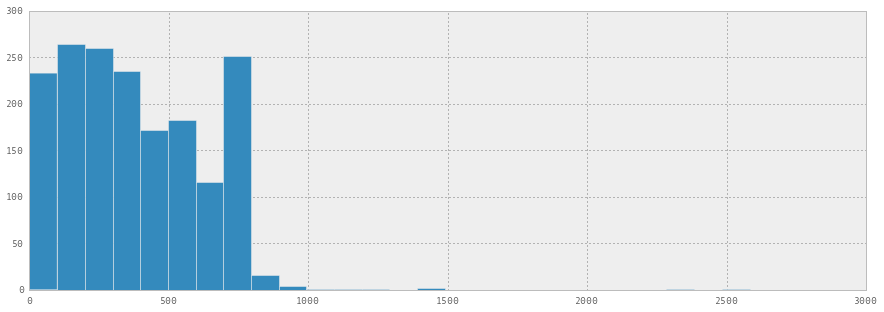

In [43]:
EntryExit.TotalDaysStay.hist(bins = 26)

In [63]:
print len(EntryExit.LastPermanentZip[EntryExit.LastPermanentZip.str.startswith('9') == True].unique()) #potentially CA zip codes
EntryExit.LastPermanentZip[EntryExit.LastPermanentZip.str.startswith('9') == False].unique()

202


array(['34601', '80215', '89101', '80911', '37221', '33411', '79007',
       '32082', '73160', '02364', '78070', '87144', '14621', '60018',
       '87103', '80524', '20148', '80134', '06151', '07726', '19572',
       '20501', '22152', '58601', '45373', '00939', '60290', '71730',
       '30904', '33173', '80011', '85131', '2152LT', '15220', '74401',
       '89431', '85037', '78028', '85349', '59901', '48239', '73527-0000',
       '02301-8401', '80226', '80207', '89117', '85141', '89104', '30126',
       '89119', '76704', '15201'], dtype=object)

In [64]:
EntryExit.LastPermanentZip[EntryExit.LastPermanentZip.str.startswith('94') == True].unique()

array(['94306', '94587', '94551', '94805', '94941', '94501', '94107',
       '94062', '94560', '94578', '94590', '94609', '94561', '94086',
       '94063', '94025', '94089', '94568', '94806', '94024', '94541',
       '94040', '94109', '94301', '94520', '94801', '94539', '94303',
       '94607', '94525', '94124', '94061'], dtype=object)